In [2]:
!pip install opencv-python

     |████████████████████████████████| 46.3 MB 28 kB/s s eta 0:00:01     |████████████████▌               | 23.9 MB 8.9 MB/s eta 0:00:03


In [3]:
import cv2
import random 
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
print(cv2.__version__)

4.5.5


In [60]:
images_dir = '/Users/vanshika/Downloads'
image_files = os.listdir(images_dir)

In [61]:
image_path = "{}/{}".format(images_dir, "vehicles-will-soon-come-fitted-with-number-plates6-1554372167.jpg")

In [62]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [63]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

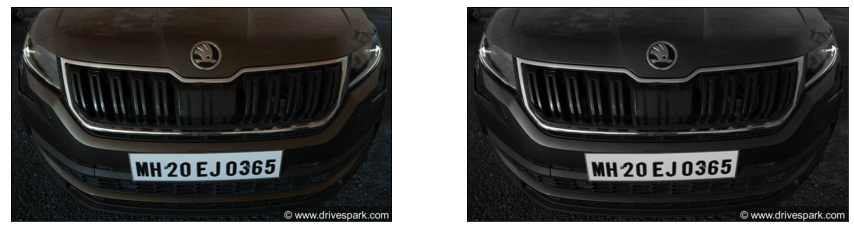

In [64]:
plot_images(image, gray)

In [65]:
blur = cv2.bilateralFilter(gray, 11,90, 90)

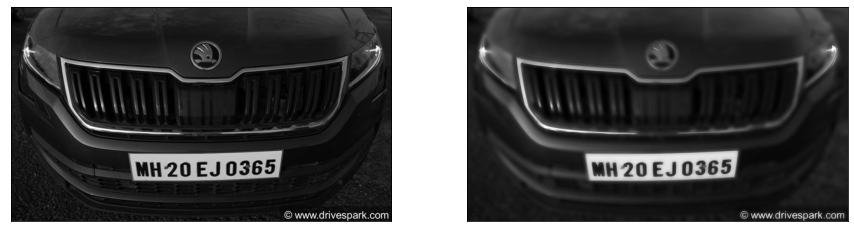

In [66]:
plot_images(gray, blur)

In [67]:
edges = cv2.Canny(blur, 30, 200)

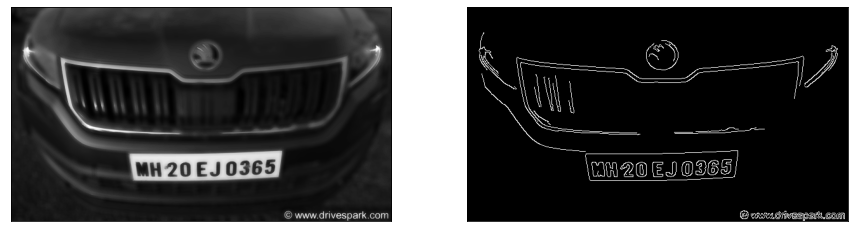

In [68]:
plot_images(blur, edges)

In [69]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [70]:
image_copy = image.copy()

In [71]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

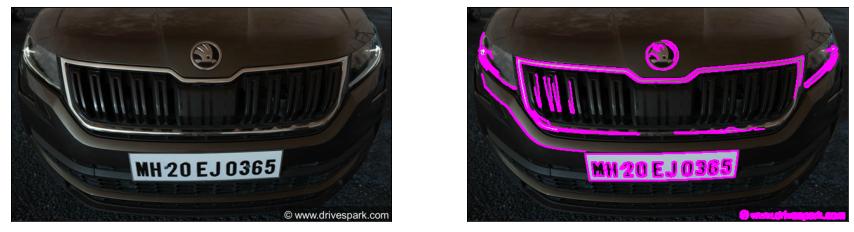

In [72]:
plot_images(image, image_copy)

In [73]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [74]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

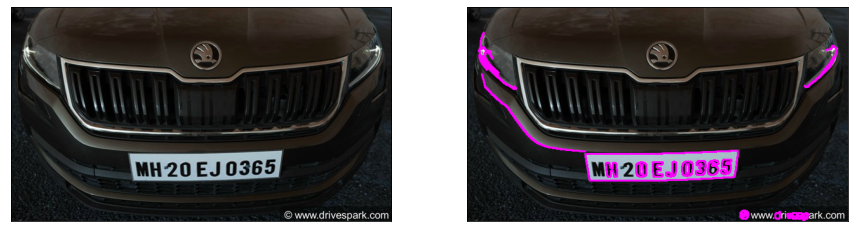

In [75]:
plot_images(image, image_copy)

In [76]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.jpg", plate)

True

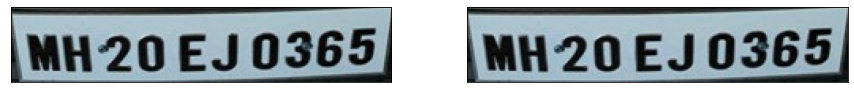

In [77]:
plot_images(plate, plate)

In [85]:
!pip3 install pytesseract

SyntaxError: invalid syntax (1857491440.py, line 1)